<a href="https://colab.research.google.com/github/AdamFunk42/AdvLinearAlgebra/blob/master/Adam's_SVD_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Project 3: Singular Value Decomposition and Images

*For this project, our objective was to look at a image and attempt to reconstruct the image using singular value decomposition. We attempted to reconstruct a matrix that is a close enough representation to the picture to recognize it. Through the process, we investigated what different numbers of singular values produced, at what value the picture was recognizable, and at what value the picture was almost indistinguishable from the original image.*




For this project, our objective was to look at a image and attempt to reconstruct the image using singular value decomposition. We attempted to reconstruct a matrix that is a close enough representation to the picture to recognize it. Through the process, we investigated what different numbers of singular values produced, at what value the picture was recognizable, and at what value the picture was almost indistinguishable from the original image. 

The properties of images and how to store the information they contain has been an issue for hundreds of years. In this age of data, it is especially critical that this information can be communicated accurately and without the usage of much space. One way to do this is by using singular value decomposition, which reads an image and takes only its most important parts and communicates it to the next person.  We investigated these properties and saw what singular values can do. 
To start, we investigated properties of the original image. We were given an image of what appears to be a raccoon amongst some shrubbery. The original size of the image was 768 rows, 1024 columns, and 3 colors that were used to produce the image. This produced a perfect image. We then investigated the color values for each row and column combination. We discovered that in the matrix that was produced, the red color was the first entry, the green color was the second entry, and the blue color was the third entry. From here, we generated code that used singular value decomposition to generate a new image using different counts of singular values. Each time that it is generated, there are three n by n matrices, once combined, given the number of singular values n. This ends up being a lot smaller than any image that is originally generated and significantly easier to communicate. 

We used only one singular value to start, just to get a baseline as to whether this process was truly working the way we wanted it to work. I expected the image to be blurry, but at least recognizable. But after running the code, we obtained the following image. 



[](face_svd_1.png)


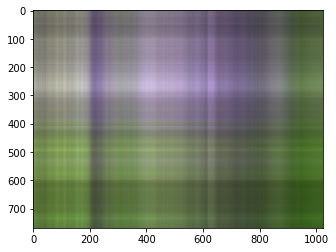

In [0]:
plt.imshow(newImg, origin='upper')

This image is not what I was expecting, but it makes sense. With only one singular value, we only have one matrix, so there is going to be very little detail. Thus, we are going to get pretty good coloration, but not a lot of detail. 

From here we started increasing the singular values in increments. The next image we tried was 5 singular values, which clears a lot of things up. Rather than a blur, the image starts to fill in some detail. At 10 singular values, the image starts to become recognizable as a raccoon, but color artifacts start to become an issue. At values 20 and 25, the detail becomes even clearer, but those color artifacts do not disappear. At a value of 50, the detail becomes so clear that we can identify individual hairs. However, the color artifacts do not disappear. At a value of 100, it becomes an image that, aside from the different coloration aspects, is indistinguishable from the original picture. At this point, it appears that we are only attempting to find a value that disposes of the colorations. 

At 500 values, the colorations are gone. After working my way down, I found that at 450, there is still a bit of coloration issues in the left eyebrow of the raccoon. Other than that, the raccoon is completely indistinguishable everywhere else. This led me to speculate that if we used all possible values were used, the picture would still be perfect. Unsurprisingly, this was indeed the case and there was no sign of coloration or any other anomalies in the image. 

When plotting the different values of each singular values, we find that as the number of singular values increases, the weight of each subsequent singular value is less than or equal to the previous one. So the singular value with the highest value is the first, followed by the second, so on and so forth. This tells us that when attempting to recreate the image, the highest singular value is used first, and each subsequent value is an improvement of the previous. In other words, the way the algorithm works is greedy in that it takes the highest value first and then the highest of the subset of the rest. 

One result that I found to be unexpected was the coloration anomalies that were found in the images. I did not even consider such chunks to exist in the first place, so to see them not only exist, but be such prevalent feature in the image was a pretty big surprise for me. Along with this was the fact that the anomalies did not go away until we were at pretty high values of 500+. I had expected there to not be any coloration issues like those at all, and once I saw them, I thought they would disappear pretty quickly. 
The most challenging thing about this project was understanding where the color values were stored. To start, I knew that the original image had places where they kept the color, but I did not understand that the color was stored in one row of data. I had originally thought that each color was the last column of a vector with already stored columns and rows, which is what we were trying to develop. Knowing how to alter something that you think is already what you want into something you want can be challenging. Once I figured out that each column of a vector was a color and that the columns and rows are in a different place and that we were trying to combine the two, everything made more sense. This was a good experience as it helped me understand what we were doing with the original image information and how we were using it to create these singular values rather than just copying code down.


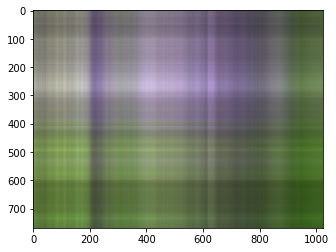

In [0]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

#  Generate a picture to analyze and save it in our directory.
face = misc.face()
imageio.imwrite('face.png', face) #create the image file
#face = imageio.imread('face.jpg') # read in the image file
face.shape, face.dtype

#  Read in face image:
origImg = misc.face()
origImg.shape, origImg.dtype
#  The image contains three colors of data.  Color data extends from 0 to 256.
#  The pixel in entry [100, 100] has values of 94/256 for Red, 82/256 for green, and 92/256 for blue:
origImg[100][100]

#make a copy of the image
copyImg = origImg.copy()
plt.imshow(copyImg, origin='upper')

#  This is a faster way of doing that same code:
r_image = copyImg[:, :, 0]
g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]

Ur, sr, Vhr = linalg.svd(r_image)
Ur.shape, sr.shape, Vhr.shape
Mr,Nr = r_image.shape
Sigr = linalg.diagsvd(sr,Mr,Nr)

# YOU:  do the same for the other two colors:
Ug, sg, Vhg = linalg.svd(g_image)
Ug.shape, sg.shape, Vhg.shape
Mg,Ng = g_image.shape
Sigg = linalg.diagsvd(sg,Mg,Ng)

Ub, sb, Vhb = linalg.svd(b_image)
Ub.shape, sb.shape, Vhr.shape
Mb,Nb = b_image.shape
Sigb = linalg.diagsvd(sb,Mb,Nb)

# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()
SSigg = Sigg.copy()
SSigb = Sigb.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 1
ZeroTo = min(SSigr.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0

# YOU: Modify the code above to do the same thing for the other two colors.
ZeroG = min(SSigg.shape) - 1
for i in range(ZeroAfter, ZeroG):
  SSigg[i][i] = 0

ZeroB = min(SSigb.shape) - 1
for i in range(ZeroAfter, ZeroB):
  SSigb[i][i] = 0

new_r_image = Ur.dot(SSigr.dot(Vhr))
new_g_image = Ug.dot(SSigg.dot(Vhg))
new_b_image = Ub.dot(SSigb.dot(Vhb))

newImg = origImg.copy()
newImg.fill(0)

newImg[:,:,0] = new_r_image
newImg[:,:,1] = new_g_image
newImg[:,:,2] = new_b_image
# YOU:  Modify the code above to pack the data for the other two colors:

plt.imshow(newImg, origin='upper')

#  save the image to your directory
filename = 'face_svd_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.